# WISCS
> Words and images in shared conceptual space

## Imports
A specalized module, `wiscs`, has been written to generated data that aligns with the various hypothesis proposed in this study.

In [26]:
import wiscs
from wiscs.simulate import DataGenerator
from wiscs.plotting import Plot, plot_deltas

import pandas as pd

import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
%matplotlib inline

## Params

`wiscs` generates data based on a set of parameters specified by the user in the form of a python dictionary. A template can be accessed and modified by running the following cell.

In [2]:
# set experiment parameters
template = wiscs.set_params(return_empty=True)
template

Params must be a dictionary of dictionaries with the following keys:
 dict_keys(['word', 'image', 'n_participants', 'n_trials', 'variance', 'dist_type'])

{'word': {'perceptual': None, 'conceptual': None, 'task': None},
 'image': {'perceptual': None, 'conceptual': None, 'task': None},
 'n_participants': None,
 'n_trials': None,
 'variance': None,
 'dist_type': None}

Below is a completed set of parameters. You can set the parameters by executing `wiscs.set_params()` which will distribute the parameters to the necessary code.

In [3]:
params = {
    "word": {
        "perceptual": 190, #ms to get from input -> perceptual processes
        "conceptual": 230, # ms to get from perceptual -> conceptual processes
        "task": 100 # ms to get from conceptual -> task processes
    }, 
    "image": {
        "perceptual": 215,
        "conceptual": 220, 
        "task": 100
    },
    "n_participants": 200,
    "n_trials": 30,
    "variance": 3,
    "dist_type": "same"
}

wiscs.set_params(params)

Params set successfully


### More details about `params`

The `params` variable is composed of elements derived from our hypotheses. We expect some time for perceptual processing, conceptual processing and task-specific processing across both hypotheses. These are in the nested dictionary of `word` and `image`. If you wish to simulate data for the main hypothesis `task` must be a single integer. However, if you wish to simulate data from the alternative hypothesis, `task` must be a tuple which define the upper and lower bounds of task timing. 

Additionally, we have elements like `n_participants`, `n_trials`, `variance` and `dist_type` which all help set up the data generation. Note that `dist_type` corresponds to the hypothesis. This is short for **_distribution type_**. If you are simulating data for the main hypothesis, then the difference distribution will be the _same_ across trials. If you are simulating data for the alternative hypothesis, then the difference distribution will be _diff_ (different) across all trials. 



## Data generation
As seen in the [README.md](/README.md), we make certain hypotheses about the data. `DataGenerator` simulates data that aligns with our main and alternative hypotheses using the `generate()` method. If you wish to provide a new set of parameters, you can reset them using `wiscs.set_params()` or simply provide a new dictionary of parameters to the generate method. This will overwrite the parameters set by `wiscs.set_params()` for that particular instance of `DataGenerator()`.

The `DataGenerator` outputs a `numpy.ndarray` corresponding to individual trials for `words` and `images`.

In [4]:
DG = DataGenerator()

word, image = DG.generate().data

You cam also turn this data into a Pandas dataframe. This includes columns that model a single data point as a participant's reaction time to a single trial. 

In [6]:
df = DG.to_pandas()
df.to_csv("stats/main.csv", index=False)
df.head()

,word,image,participant,trial
0,520.972741,538.385515,0,0
1,518.206502,532.288151,0,1
2,519.758287,537.001230,0,2
3,517.425916,541.130657,0,3
4,519.734659,534.279777,0,4


Let's provide a new set of parameters to model the alternative hypothesis.

In [8]:
alt_params = {
    "word": {
        "perceptual": 190, #ms to get from input -> perceptual processes
        "conceptual": 230, # ms to get from perceptual -> conceptual processes
        "task": (100, 150) # ms to get from conceptual -> task processes
    }, 
    "image": {
        "perceptual": 215,
        "conceptual": 220, 
        "task": (130, 170)
    },
    "n_participants": 200,
    "n_trials": 30,
    "variance": 3, 
    'dist_type': 'diff'
}

In [9]:
altDG = DataGenerator()
alt_word, alt_image = altDG.generate(params=alt_params).data
alt_df = altDG.to_pandas()
alt_df.to_csv("stats/alt.csv", index=False)

## Visualizing the data

Let's see what the data look like.

In [21]:
plot = Plot(DG)
alt_plot = Plot(altDG)

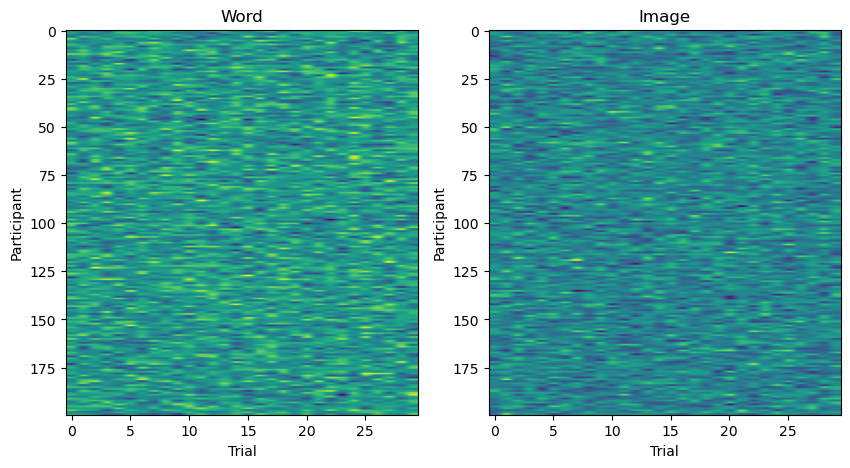

In [22]:
plot.imshow()

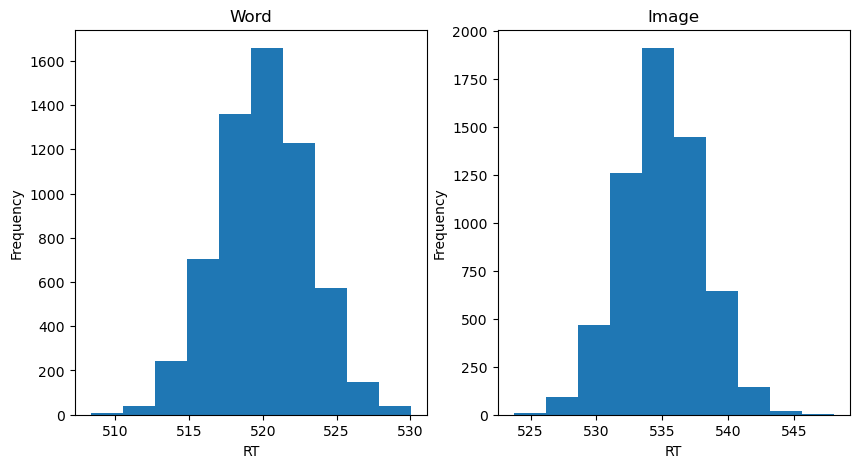

In [23]:
plot.hist()

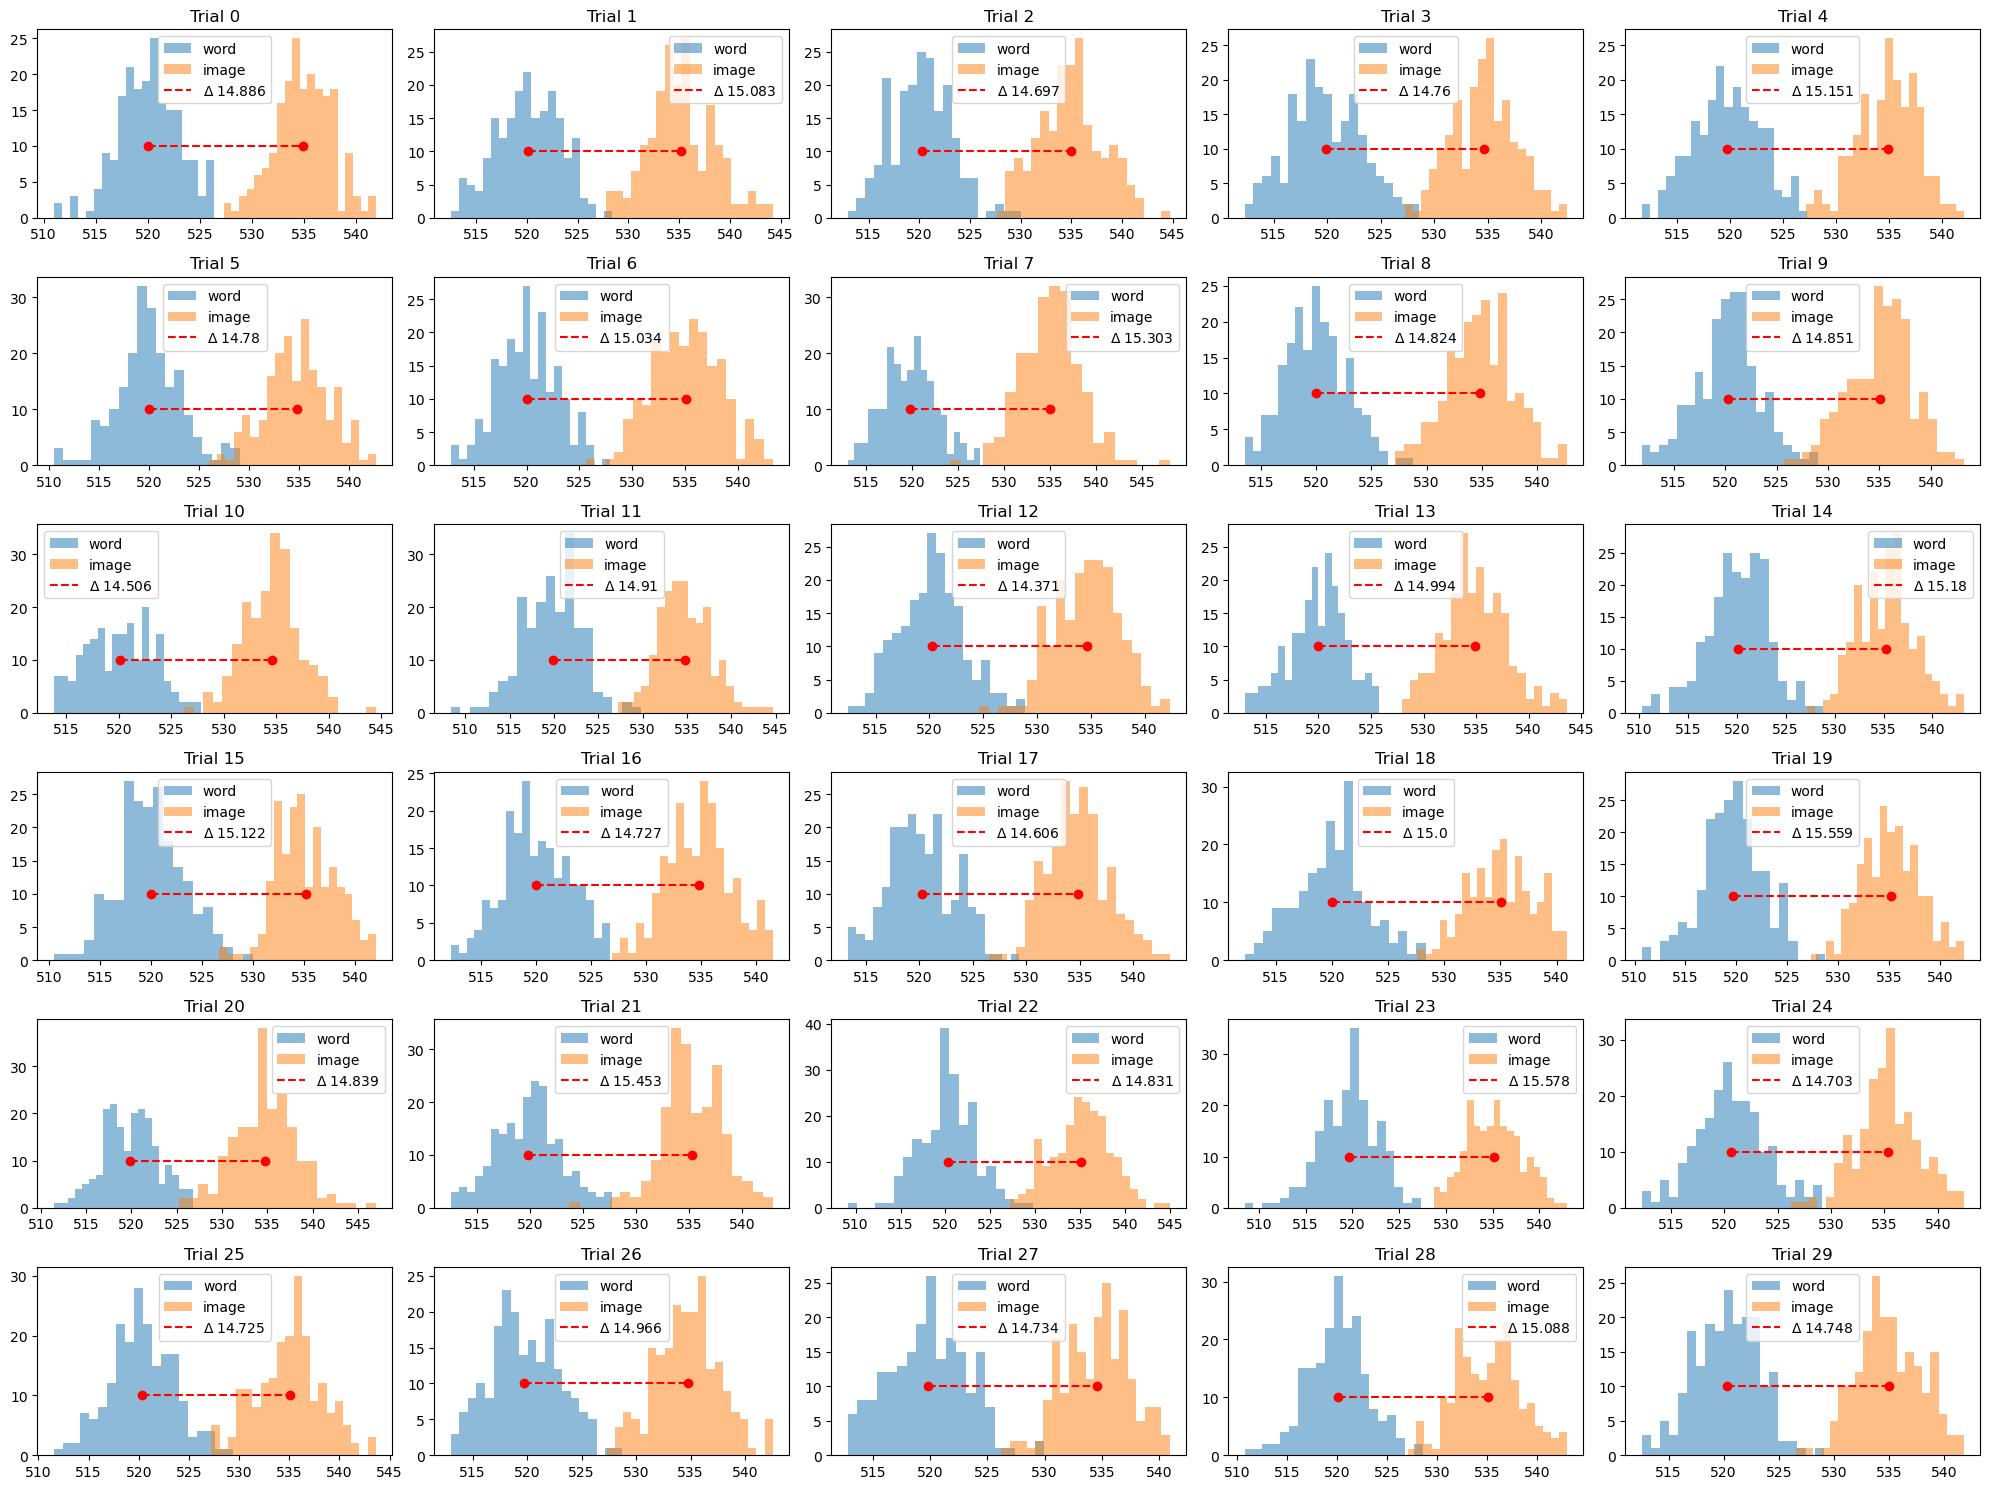

<Figure size 640x480 with 0 Axes>

In [25]:
plot.grid()
plt.savefig('figs/main_grid.png', dpi=500)

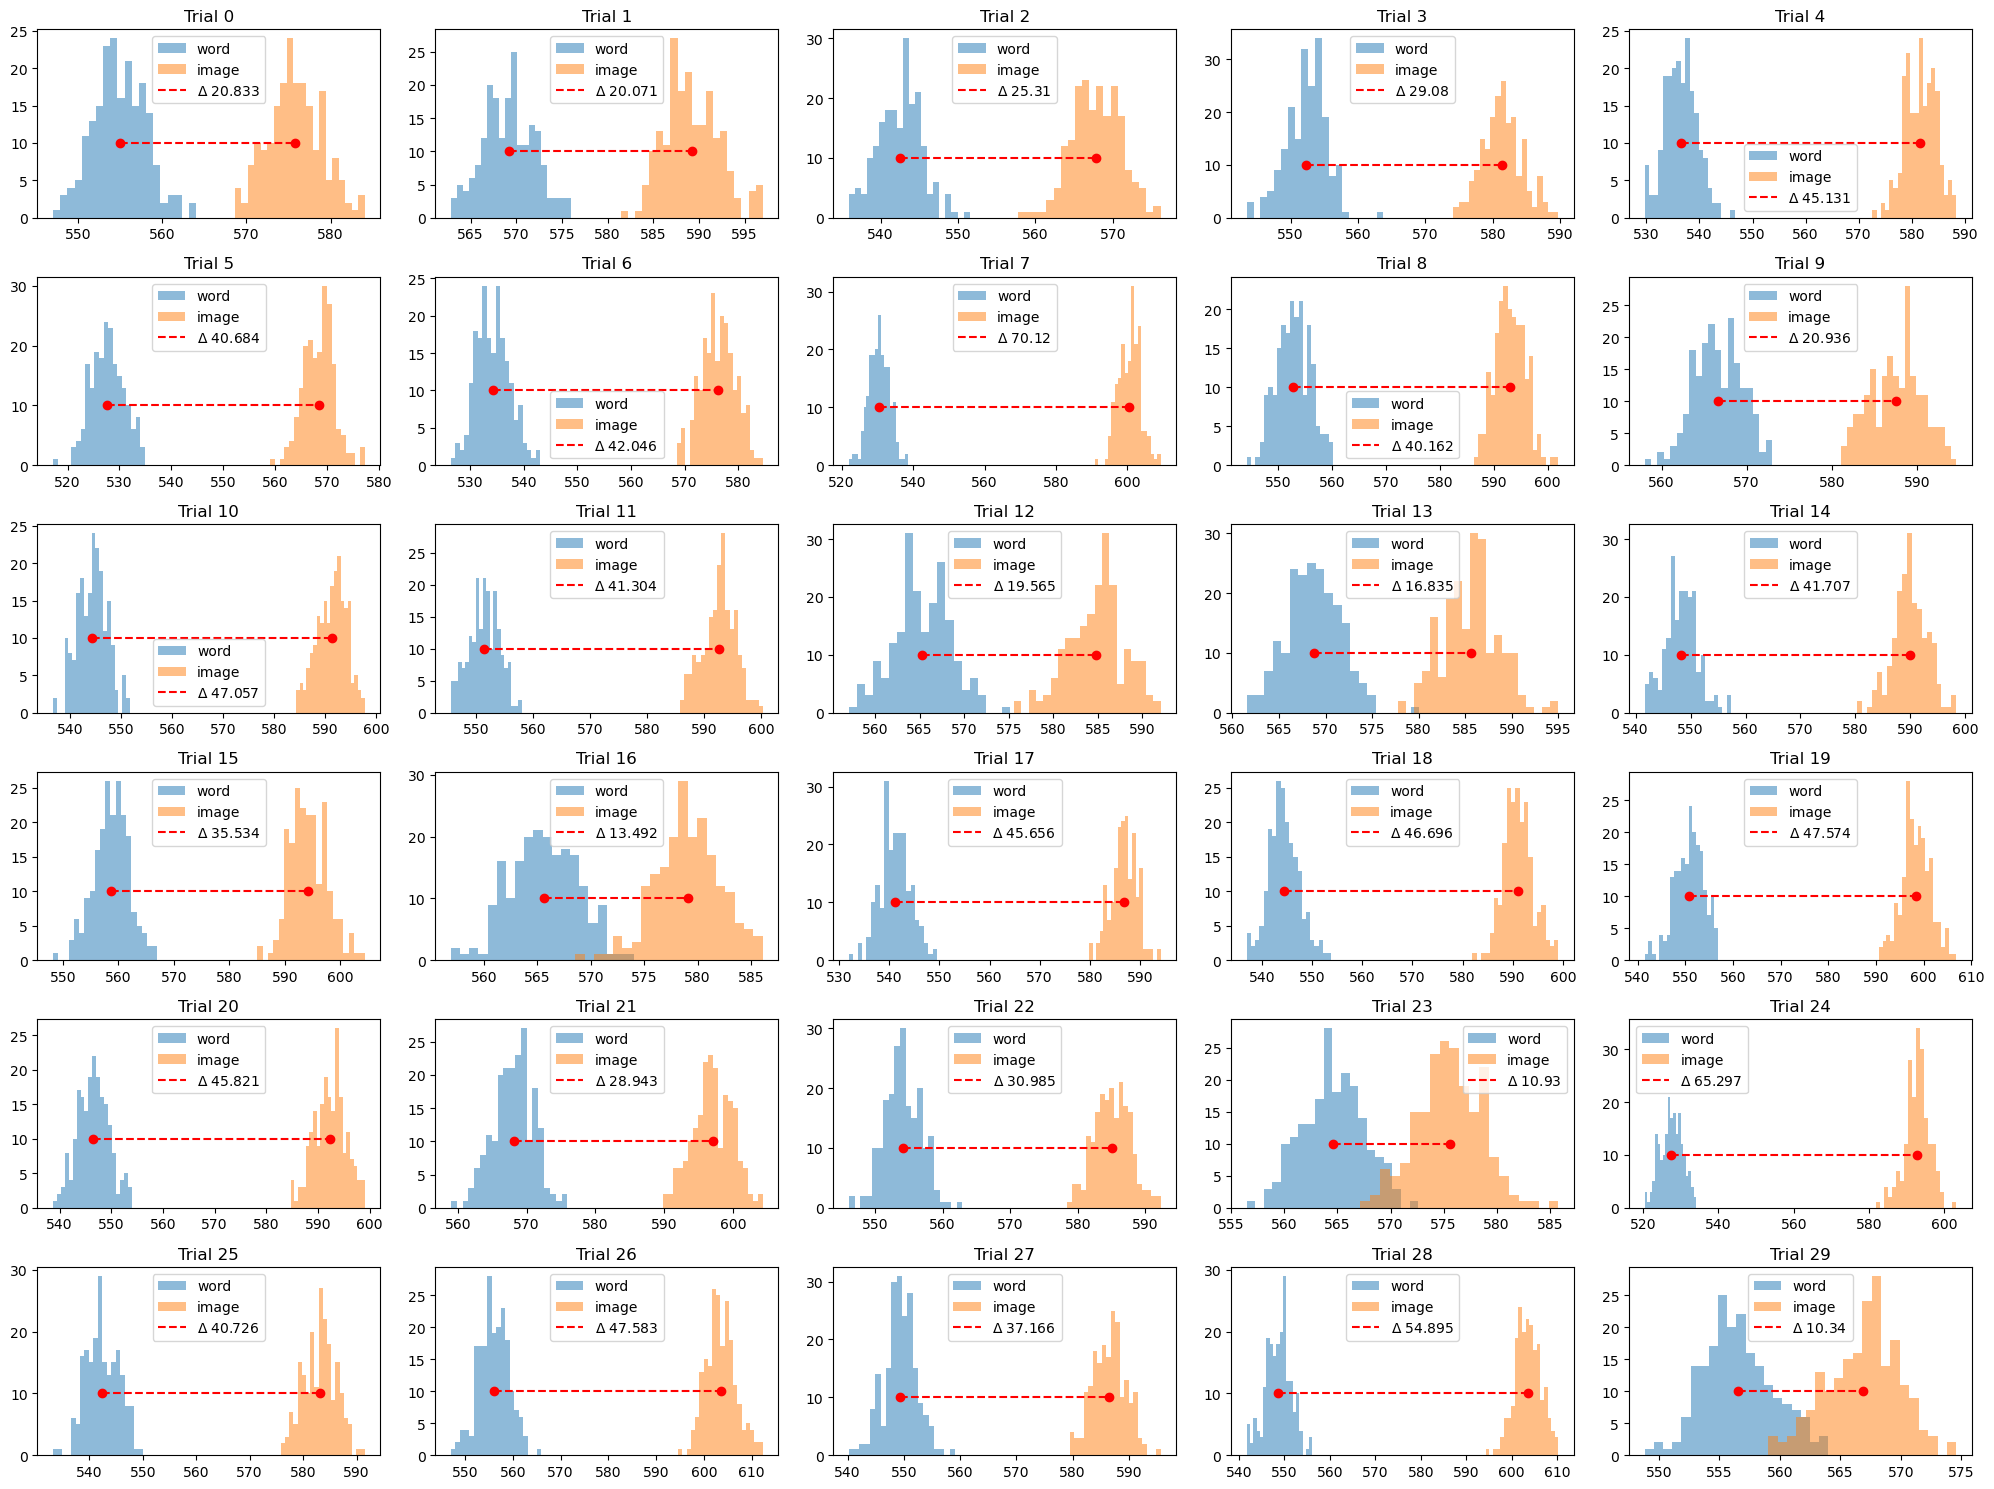

<Figure size 640x480 with 0 Axes>

In [29]:
alt_plot.grid()
plt.savefig('figs/alt_grid.png', dpi=500)

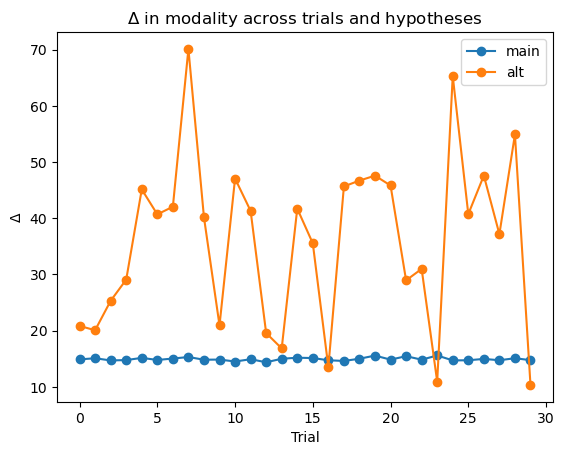

<Figure size 640x480 with 0 Axes>

In [27]:
plot_deltas(plot.deltas, alt_plot.deltas, ["main", "alt"])
plt.savefig('figs/deltas.png', dpi=500)

## Multiple questions

The above code simulates data for responses to _one_ question only. We can update the `task` parameter in a loop to see how out data might look across multiple questions. 

In [2]:
# main task params
tasks = [100, 130, 115, 200, 120, 115, 125, 111, 123, 98]

# alt task params
alt_word_tasks = [(100, 110), (130, 122), (99, 105), (200, 190), (120, 125), (115, 124), (125, 131), (111, 115), (123, 129), (98, 103)]
alt_image_tasks = [(125, 131), (130, 122), (100, 110), (123, 129), (200, 190), (120, 125), (115, 124), (111, 115), (99, 105), (98, 103)]

In [28]:
n_qs = 10

main_deltas = []
alt_deltas = []

# save data for later
df = []

for i in range(n_qs):
    
    params = {
    "word": {
        "perceptual": 190, #ms to get from input -> perceptual processes
        "conceptual": 230, # ms to get from perceptual -> conceptual processes
        "task": tasks[i] # ms to get from conceptual -> task processes
    }, 
    "image": {
        "perceptual": 215,
        "conceptual": 220, 
        "task": tasks[i]
    },
    "n_participants": 200,
    "n_trials": 30,
    "variance": 3,
    "dist_type": "same"
}
    
    alt_params = {
    "word": {
        "perceptual": 190, #ms to get from input -> perceptual processes
        "conceptual": 230, # ms to get from perceptual -> conceptual processes
        "task": alt_word_tasks[i] # ms to get from conceptual -> task processes
    }, 
    "image": {
        "perceptual": 215,
        "conceptual": 220, 
        "task": alt_image_tasks[i]
    },
    "n_participants": 200,
    "n_trials": 30,
    "variance": 3, 
    'dist_type': 'diff'
}

    DG = DataGenerator().generate(params=params)
    altDG = DataGenerator().generate(params=alt_params)
    _df = DG.to_pandas()
    _df["question"] = i
    df.append(_df)

    plot = Plot(DG).grid(show=False)
    alt_plot = Plot(altDG).grid(show=False)
    
    main_deltas.append(plot.deltas)
    alt_deltas.append(alt_plot.deltas)

# save data for later
df = pd.concat(df)

Let's look at these differences across trials.

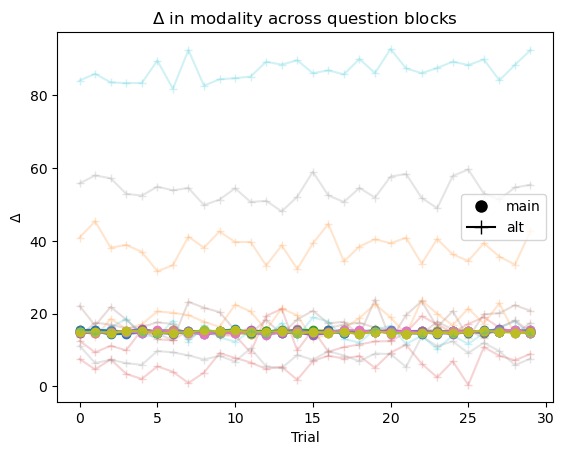

In [25]:
for i in range(10):
    plt.plot(main_deltas[i], marker='o')
    plt.plot(alt_deltas[i], marker='+', alpha=0.2)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='main', markerfacecolor='k', markersize=10),
    Line2D([0], [0], marker='+', color='k', label='alt', markerfacecolor='w', markersize=10)
]

plt.legend(handles=legend_elements)
plt.xlabel('Trial')
plt.ylabel("$\\Delta$")
plt.title('$\\Delta$ in modality across question blocks')

plt.show()
